# Task 28: Exploring Cross-Validation, Overfitting, and Underfitting

In this notebook, we will explore the concepts of cross-validation, overfitting, and underfitting. We'll use a sample dataset and various models to illustrate these concepts.

## 1. Import Libraries
Let's start by importing the necessary libraries.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


## 2. Load and Prepare Data
We'll use the Iris dataset for this analysis and prepare it for modeling.


In [4]:
# Cell 2: Load and Prepare Data
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data Loaded and Preprocessed")


Data Loaded and Preprocessed


## 3. Cross-Validation
We'll perform cross-validation to evaluate the performance of different models.


In [5]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Perform cross-validation
cv_results = {}
for name, model in models.items():
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

print("Cross-Validation Completed")

Logistic Regression Cross-Validation Accuracy: 0.97 ± 0.04
Decision Tree Cross-Validation Accuracy: 0.95 ± 0.05
Random Forest Cross-Validation Accuracy: 0.96 ± 0.05
Cross-Validation Completed


## 4. Overfitting and Underfitting
To explore overfitting and underfitting, we'll train models with varying complexities and observe their performance on training and test data.


Evaluating Overfitting and Underfitting
Logistic Regression - Train Accuracy: 0.96, Test Accuracy: 1.00


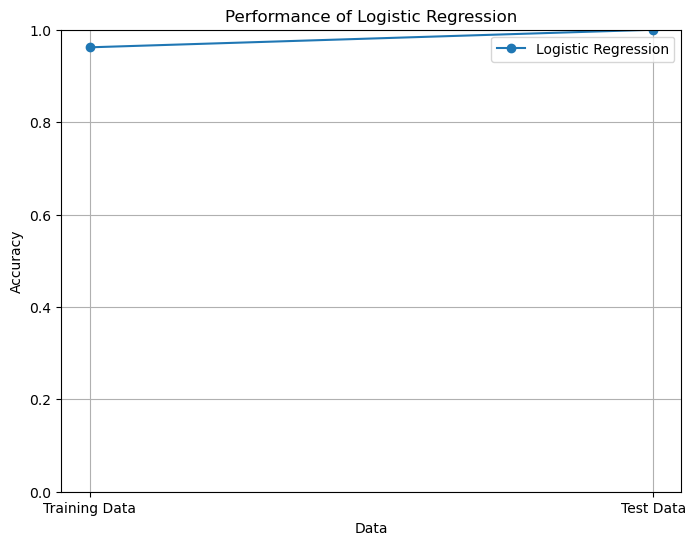

In [ ]:
# Cell 4: Overfitting and Underfitting

def plot_model_performance(model, model_name, X_train, y_train, X_test, y_test):
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict on training and test data
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    print(f"{model_name} - Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot([1, 2], [train_accuracy, test_accuracy], marker='o', label=model_name)
    plt.xlabel('Data')
    plt.ylabel('Accuracy')
    plt.title(f'Performance of {model_name}')
    plt.xticks([1, 2], ['Training Data', 'Test Data'])
    plt.ylim([0, 1])
    plt.legend()
    plt.grid(True)
    plt.show()

# Train and evaluate models with different complexities
print("Evaluating Overfitting and Underfitting")

# Simpler model (high bias, underfitting)
simple_model = LogisticRegression(max_iter=200)
plot_model_performance(simple_model, 'Logistic Regression', X_train, y_train, X_test, y_test)

# More complex model (low bias, high variance, overfitting)
complex_model = RandomForestClassifier(n_estimators=100)
plot_model_performance(complex_model, 'Random Forest', X_train, y_train, X_test, y_test)
